# Google Drive Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libs

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the config of the plotsa we will create

# 0. Read Data

In [63]:
# Read excel data from google drive
data_path = '/content/drive/MyDrive/Year 1/Semester 1/Project Year 1/DataSci/Accounting and Financial Report.xlsx'
df = pd.read_excel(data_path,
                   converters=
                    {
                     "TRANSACTION_ID":str,
                     "BANK_ACC":str
                    }
                   )

Target: Prodict how long does it take to finish one document

Feature: Vendor Name, Documen Type,

# 1. EDA & Data Wrangling


In [64]:
df

,TRANSACTION_ID,CLEARED_ITEM,COMPANY_CODE,VENDOR_NAME,VENDOR_NAME.1,REFERENCE,DOCUMENT_NUMBER,DOCUMENT_TYPE,BANK,BANK_ACC,...,NET_DUE_DATE,COMPANY_CODE_CURRENCY_VALUE,COMPANY_CODE_CURRENCY_KEY,USER_ID,CLEARING_DATE,CLEARING_DOCUMENT,PAYMENT_TERMS,ENTRY_DATE,BASELINE_PAYMENT_DTE,TIME_OF_ENTRY
0,1,Selected,BB001,15137258,Global Systems,INV022411-025,BB0015100000822,RE,NaN,NaN,...,2023-03-15 00:00:00,53500.0,THB,DS0063,2023-03-15 00:00:00,BB0011500000673,N30,2023-02-23 00:00:00,2023-02-14 00:00:00,07:21:57
1,2,Selected,AA001,61136291,Vision Group,1/2024,AA0015100013474,RE,NaN,NaN,...,2023-09-30 00:00:00,173586.0,THB,DS0077,2023-09-25 00:00:00,AA0011500004378,N30,2023-09-10 00:00:00,2023-08-31 00:00:00,04:13:54
2,3,Selected,AA001,61136291,Vision Group,2/2024,AA0015100015157,RE,NaN,NaN,...,2023-10-19 00:00:00,260577.0,THB,DS0069,2023-10-22 00:00:00,AA0011500004854,N30,2023-10-08 00:00:00,2023-09-19 00:00:00,07:10:19
3,4,Selected,AA001,61136291,Vision Group,THONG TRANSPORT,AA0011500004378,KZ,BBL,5659236625,...,2024-09-25 00:00:00,173586.0,THB,DS0061,2024-09-25 00:00:00,AA0011500004378,N30,2024-09-23 00:00:00,2024-09-25 00:00:00,03:56:34
4,5,Selected,AA001,61136291,Vision Group,THONG TRANSPORT,AA0011500004854,KZ,BBL,5659236625,...,2024-10-22 00:00:00,260577.0,THB,DS0061,2024-10-22 00:00:00,AA0011500004854,N30,2024-10-15 00:00:00,2024-10-22 00:00:00,17:11:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().sum() * 100 / len(df)

# Print the results
null_percentage

# There are VENDOR_NAME and VENDOR_NAME.1

,0
TRANSACTION_ID,0.343702
CLEARED_ITEM,0.343702
COMPANY_CODE,0.343702
VENDOR_NAME,0.343702
VENDOR_NAME.1,0.343702
REFERENCE,0.343702
DOCUMENT_NUMBER,0.343702
DOCUMENT_TYPE,0.343702
BANK,67.973879
BANK_ACC,67.973879


In [66]:
# Change "VENDOR_NAME" to "VENDOR_CODE"
df.rename(columns={'VENDOR_NAME': 'VENDOR_CODE','VENDOR_NAME.1': 'VENDOR_NAME'}, inplace=True)

In [67]:
# It seems there are null/blank rows from read xlsx, clean them out...
df.dropna(how='all', inplace=True)

In [68]:
df

,TRANSACTION_ID,CLEARED_ITEM,COMPANY_CODE,VENDOR_CODE,VENDOR_NAME,REFERENCE,DOCUMENT_NUMBER,DOCUMENT_TYPE,BANK,BANK_ACC,...,NET_DUE_DATE,COMPANY_CODE_CURRENCY_VALUE,COMPANY_CODE_CURRENCY_KEY,USER_ID,CLEARING_DATE,CLEARING_DOCUMENT,PAYMENT_TERMS,ENTRY_DATE,BASELINE_PAYMENT_DTE,TIME_OF_ENTRY
0,1,Selected,BB001,15137258,Global Systems,INV022411-025,BB0015100000822,RE,NaN,NaN,...,2023-03-15 00:00:00,53500.00,THB,DS0063,2023-03-15 00:00:00,BB0011500000673,N30,2023-02-23 00:00:00,2023-02-14 00:00:00,07:21:57
1,2,Selected,AA001,61136291,Vision Group,1/2024,AA0015100013474,RE,NaN,NaN,...,2023-09-30 00:00:00,173586.00,THB,DS0077,2023-09-25 00:00:00,AA0011500004378,N30,2023-09-10 00:00:00,2023-08-31 00:00:00,04:13:54
2,3,Selected,AA001,61136291,Vision Group,2/2024,AA0015100015157,RE,NaN,NaN,...,2023-10-19 00:00:00,260577.00,THB,DS0069,2023-10-22 00:00:00,AA0011500004854,N30,2023-10-08 00:00:00,2023-09-19 00:00:00,07:10:19
3,4,Selected,AA001,61136291,Vision Group,THONG TRANSPORT,AA0011500004378,KZ,BBL,5659236625,...,2024-09-25 00:00:00,173586.00,THB,DS0061,2024-09-25 00:00:00,AA0011500004378,N30,2024-09-23 00:00:00,2024-09-25 00:00:00,03:56:34
4,5,Selected,AA001,61136291,Vision Group,THONG TRANSPORT,AA0011500004854,KZ,BBL,5659236625,...,2024-10-22 00:00:00,260577.00,THB,DS0061,2024-10-22 00:00:00,AA0011500004854,N30,2024-10-15 00:00:00,2024-10-22 00:00:00,17:11:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57985,57986,Selected,AA001,R000000104,Fusion Services,A1122407200043,AA00140340083,R2,NaN,NaN,...,2024-08-25 00:00:00,3598400.00,THB,DS0045,2024-08-15 00:00:00,AA0011400001071,N01,2024-07-26 00:00:00,2024-07-26 00:00:00,04:32:40
57986,57987,Selected,AA001,R000000104,Fusion Services,A1122407200006,AA00140329538,R2,NaN,NaN,...,2024-08-08 00:00:00,3651008.64,THB,DS0045,2024-08-05 00:00:00,AA0011400001035,N01,2024-07-10 00:00:00,2024-07-09 00:00:00,04:27:56
57987,57988,Selected,AA001,R000000104,Fusion Services,A1122408200035,AA00140356723,R2,NaN,NaN,...,2024-09-19 00:00:00,8000345.76,THB,DS0045,2024-09-12 00:00:00,AA0011400001218,N01,2024-08-21 00:00:00,2024-08-20 00:00:00,04:34:00
57988,57989,Selected,AA001,R000000104,Fusion Services,A1122408200045,AA00140358319,R2,NaN,NaN,...,2024-11-20 00:00:00,6807060.00,THB,DS0045,2024-09-05 00:00:00,AA0011400001191,N01,2024-08-23 00:00:00,2024-08-22 00:00:00,03:59:57


In [69]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().sum() * 100 / len(df)

# Print the results
null_percentage

,0
TRANSACTION_ID,0.000000
CLEARED_ITEM,0.000000
COMPANY_CODE,0.000000
VENDOR_CODE,0.000000
VENDOR_NAME,0.000000
REFERENCE,0.000000
DOCUMENT_NUMBER,0.000000
DOCUMENT_TYPE,0.000000
BANK,67.863425
BANK_ACC,67.863425


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57990 entries, 0 to 57989
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TRANSACTION_ID               57990 non-null  object 
 1   CLEARED_ITEM                 57990 non-null  object 
 2   COMPANY_CODE                 57990 non-null  object 
 3   VENDOR_CODE                  57990 non-null  object 
 4   VENDOR_NAME                  57990 non-null  object 
 5   REFERENCE                    57990 non-null  object 
 6   DOCUMENT_NUMBER              57990 non-null  object 
 7   DOCUMENT_TYPE                57990 non-null  object 
 8   BANK                         18636 non-null  object 
 9   BANK_ACC                     18636 non-null  object 
 10  BANK_INFO                    57990 non-null  object 
 11  DOCUMENT_DATE                57990 non-null  object 
 12  POSTING_DATE                 57990 non-null  object 
 13  NET_DUE_DATE         

In [71]:
df.describe(include='all')

,TRANSACTION_ID,CLEARED_ITEM,COMPANY_CODE,VENDOR_CODE,VENDOR_NAME,REFERENCE,DOCUMENT_NUMBER,DOCUMENT_TYPE,BANK,BANK_ACC,...,NET_DUE_DATE,COMPANY_CODE_CURRENCY_VALUE,COMPANY_CODE_CURRENCY_KEY,USER_ID,CLEARING_DATE,CLEARING_DOCUMENT,PAYMENT_TERMS,ENTRY_DATE,BASELINE_PAYMENT_DTE,TIME_OF_ENTRY
count,57990,57990,57990,57990.0,57990,57990,57990,57990,18636,18636,...,57990,5.799000e+04,57990,57990,56197,57990,57990,57990,57990,57990
unique,57990,2,3,1860.0,100,41232,46614,5,2,6,...,780,NaN,1,52,602,17467,9,612,705,32020
top,1,Selected,AA001,16137156.0,Solutions Enterprises,TS PLASPACK,BB0011400001879,RE,BBL,4212369857,...,2023-11-30 00:00:00,NaN,THB,DS0063,2023-11-30 00:00:00,BB001,N30,2023-12-07 00:00:00,2023-11-30 00:00:00,07:55:30
freq,1,56197,28342,915.0,2291,180,76,33866,12539,5618,...,344,NaN,57990,9021,965,1006,56621,494,464,77
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.802762e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.495669e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.797735e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.236415e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.069861e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df.columns

Index(['TRANSACTION_ID', 'CLEARED_ITEM', 'COMPANY_CODE', 'VENDOR_CODE',
       'VENDOR_NAME', 'REFERENCE', 'DOCUMENT_NUMBER', 'DOCUMENT_TYPE', 'BANK',
       'BANK_ACC', 'BANK_INFO', 'DOCUMENT_DATE', 'POSTING_DATE',
       'NET_DUE_DATE', 'COMPANY_CODE_CURRENCY_VALUE',
       'COMPANY_CODE_CURRENCY_KEY', 'USER_ID', 'CLEARING_DATE',
       'CLEARING_DOCUMENT', 'PAYMENT_TERMS', 'ENTRY_DATE',
       'BASELINE_PAYMENT_DTE', 'TIME_OF_ENTRY'],
      dtype='object')

In [73]:
# prompt: Convert "CLEARING_DATE", "ENTRY_DATE","BASELINE_PAYMENT_DATE" to date
# CONVERT "TIME_OF_ENTRY" to time

# Convert specified columns to datetime objects
df['DOCUMENT_DATE'] = pd.to_datetime(df['DOCUMENT_DATE'], errors='coerce')
df['POSTING_DATE'] = pd.to_datetime(df['POSTING_DATE'], errors='coerce')
df['NET_DUE_DATE'] = pd.to_datetime(df['NET_DUE_DATE'], errors='coerce')
df['CLEARING_DATE'] = pd.to_datetime(df['CLEARING_DATE'], errors='coerce')
df['ENTRY_DATE'] = pd.to_datetime(df['ENTRY_DATE'],errors='coerce')
df['BASELINE_PAYMENT_DTE'] = pd.to_datetime(df['BASELINE_PAYMENT_DTE'], errors='coerce')


In [75]:
#Mapping Payment term to Int, so we can know how long does it take for credit term in days value

# Mapping payment term to number
df['PAYMENT_TERMS'] = df['PAYMENT_TERMS'].replace({'N30': 30, 'N75': 75, 'N60':60, 'N07':7,'N01':1, 'N90':90, 'N14':14, 'N20':20, 'N10':10}).astype(int)

# convert TIME_OF_ENTRY to seconds for calculate how long does it take to finish one document (extracting the first value before :, multiply by 60 and plus the second Value after : ) Example, 7:51:23 will be (7*60)+ 51
df['TIME_OF_ENTRY'] = df['TIME_OF_ENTRY'].astype(str).str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))




In [77]:
## AVG TIME_OF_ENTRY groupby DOCUMENT_TYPE, so we can create ordinal labeling
df_time_of_entry = df.groupby('DOCUMENT_TYPE')['TIME_OF_ENTRY'].mean().reset_index().sort_values(by='TIME_OF_ENTRY', ascending=True)
df_time_of_entry

# DZ = 1, KR = 2, = RE, R2 = 4, KZ= 5

,DOCUMENT_TYPE,TIME_OF_ENTRY
0,DZ,414.306648
1,KR,467.996716
4,RE,490.829770
3,R2,513.688235
2,KZ,515.893569


In [78]:
## AVG TIME_OF_ENTRY groupby Company, so we can create ordinal labeling
df_time_of_entry_by_company = df.groupby('COMPANY_CODE')['TIME_OF_ENTRY'].mean().reset_index().sort_values(by='TIME_OF_ENTRY', ascending=True)
df_time_of_entry_by_company

# BB001 = 1, CC001	 = 2, AA001 = 3

,COMPANY_CODE,TIME_OF_ENTRY
1,BB001,434.618722
2,CC001,473.717547
0,AA001,519.811305


In [79]:
## AVG TIME_OF_ENTRY groupby BANK, so we can create ordinal labeling
df_time_of_entry_by_bank = df.groupby('BANK')['TIME_OF_ENTRY'].mean().reset_index().sort_values(by='TIME_OF_ENTRY', ascending=True)
df_time_of_entry_by_bank

# SCB = 1, BBL = 2

,BANK,TIME_OF_ENTRY
1,SCB,464.942431
0,BBL,482.781721


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57990 entries, 0 to 57989
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TRANSACTION_ID               57990 non-null  object        
 1   CLEARED_ITEM                 57990 non-null  object        
 2   COMPANY_CODE                 57990 non-null  object        
 3   VENDOR_CODE                  57990 non-null  object        
 4   VENDOR_NAME                  57990 non-null  object        
 5   REFERENCE                    57990 non-null  object        
 6   DOCUMENT_NUMBER              57990 non-null  object        
 7   DOCUMENT_TYPE                57990 non-null  object        
 8   BANK                         18636 non-null  object        
 9   BANK_ACC                     18636 non-null  object        
 10  BANK_INFO                    57990 non-null  object        
 11  DOCUMENT_DATE                57792 non-null  d

In [81]:
# Calculate the percentage of null values in each column
null_percentage = df.isnull().sum()
# Print the results
null_percentage

,0
TRANSACTION_ID,0
CLEARED_ITEM,0
COMPANY_CODE,0
VENDOR_CODE,0
VENDOR_NAME,0
REFERENCE,0
DOCUMENT_NUMBER,0
DOCUMENT_TYPE,0
BANK,39354
BANK_ACC,39354


Visualize

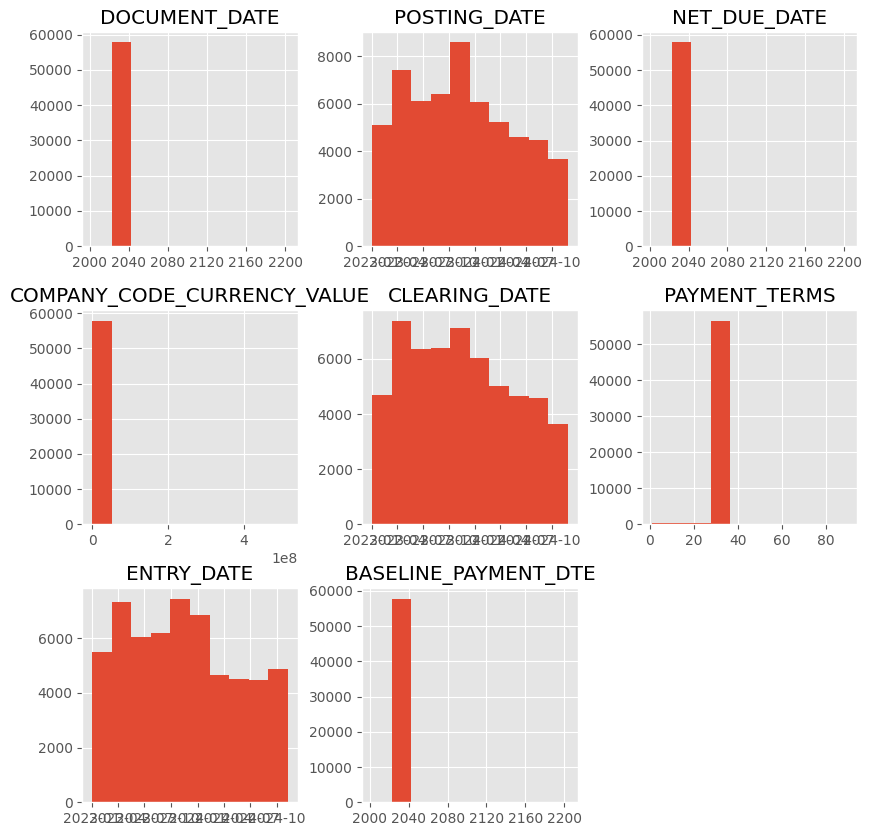

In [ ]:
# Distribution of numerical features
df.hist(figsize=(10, 10))
plt.show()


We have many Vendors, some deal with us a lot, some not

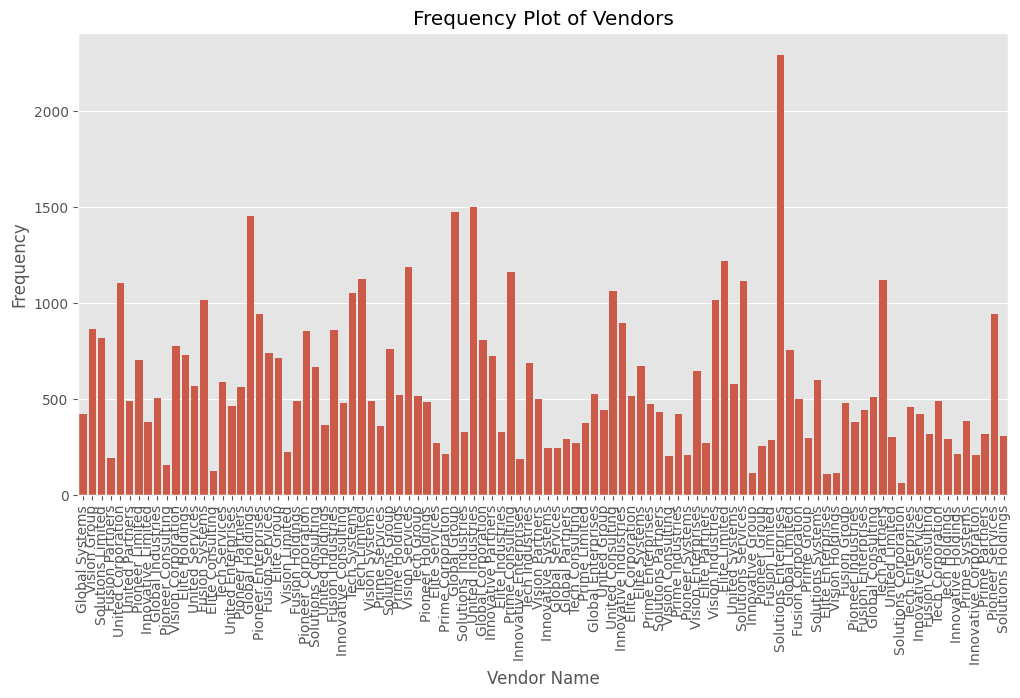

In [ ]:


# Frequency plot of vendor
plt.figure(figsize=(12, 6))
sns.countplot(x='VENDOR_NAME', data=df)
plt.xticks(rotation=90)
plt.title('Frequency Plot of Vendors')
plt.xlabel('Vendor Name')
plt.ylabel('Frequency')
plt.show()

Half of the transaction are from AA001

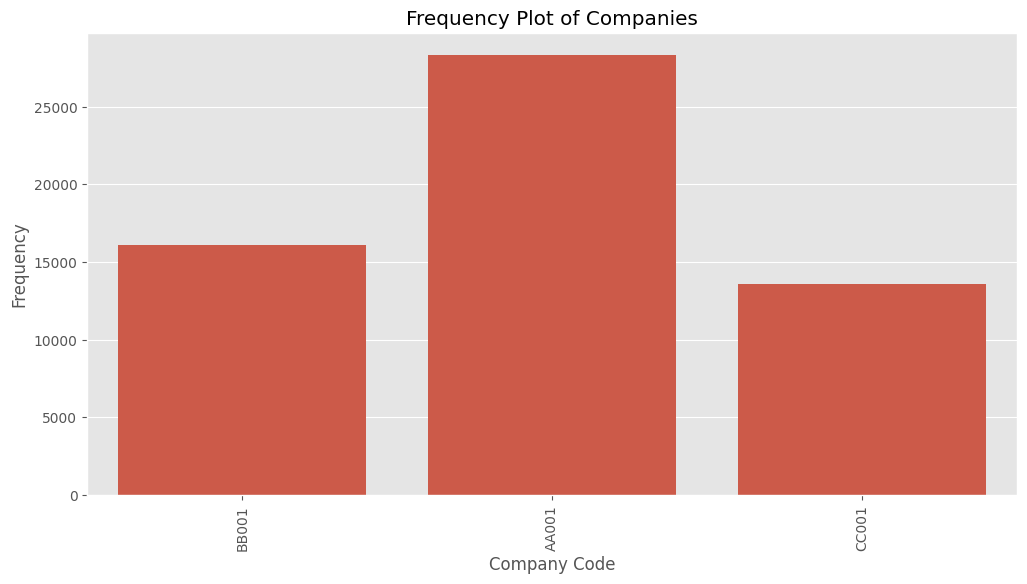

In [ ]:
# Frequency plot of company
plt.figure(figsize=(12, 6))
sns.countplot(x='COMPANY_CODE', data=df)
plt.xticks(rotation=90)
plt.title('Frequency Plot of Companies')
plt.xlabel('Company Code')
plt.ylabel('Frequency')
plt.show()

Document Type "RE" (Payment Invoice PO) are the most frequent

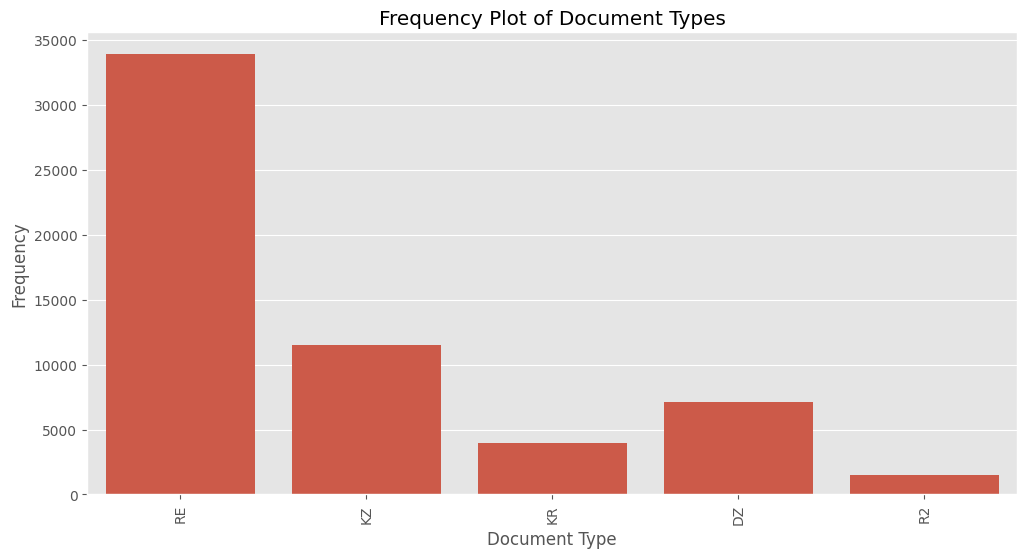

In [ ]:
# Frequency plot of DOCUMENT TYPE
plt.figure(figsize=(12, 6))
sns.countplot(x='DOCUMENT_TYPE', data=df)
plt.xticks(rotation=90)
plt.title('Frequency Plot of Document Types')
plt.xlabel('Document Type')
plt.ylabel('Frequency')
plt.show()

Most of the transaction are from BBL

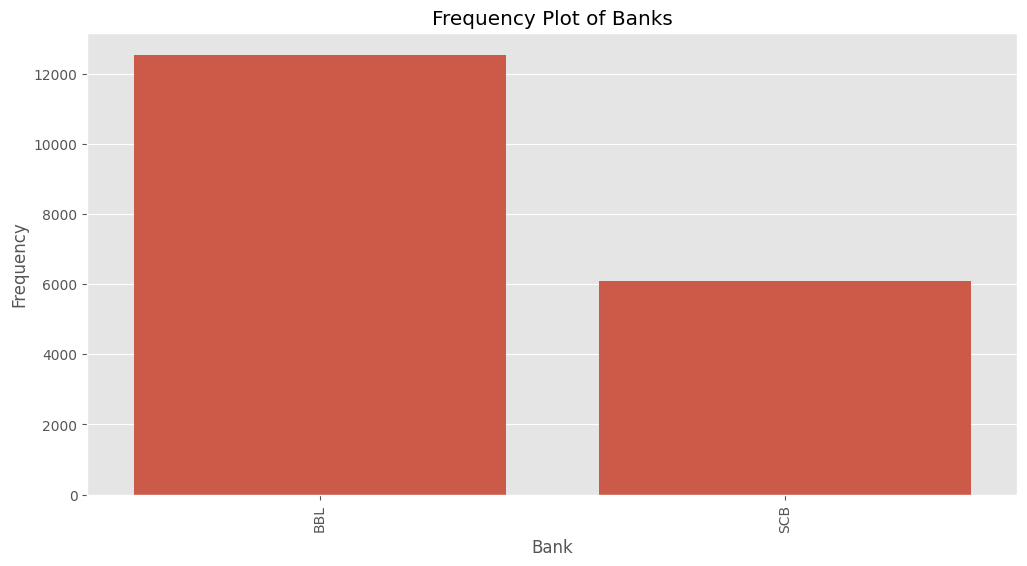

In [ ]:
# Frequency plot of BANK
plt.figure(figsize=(12, 6))
sns.countplot(x='BANK', data=df)
plt.xticks(rotation=90)
plt.title('Frequency Plot of Banks')
plt.xlabel('Bank')
plt.ylabel('Frequency')
plt.show()


# 2. Feature Engineering

In [89]:
df_doc_time = df.copy()

In [90]:
df_doc_time.columns

Index(['TRANSACTION_ID', 'CLEARED_ITEM', 'COMPANY_CODE', 'VENDOR_CODE',
       'VENDOR_NAME', 'REFERENCE', 'DOCUMENT_NUMBER', 'DOCUMENT_TYPE', 'BANK',
       'BANK_ACC', 'BANK_INFO', 'DOCUMENT_DATE', 'POSTING_DATE',
       'NET_DUE_DATE', 'COMPANY_CODE_CURRENCY_VALUE',
       'COMPANY_CODE_CURRENCY_KEY', 'USER_ID', 'CLEARING_DATE',
       'CLEARING_DOCUMENT', 'PAYMENT_TERMS', 'ENTRY_DATE',
       'BASELINE_PAYMENT_DTE', 'TIME_OF_ENTRY'],
      dtype='object')

      pick needed value

In [92]:
df_doc_time = df_doc_time[['COMPANY_CODE', 'DOCUMENT_TYPE',
                       'BANK', 'DOCUMENT_DATE', 'POSTING_DATE','PAYMENT_TERMS',
                      'COMPANY_CODE_CURRENCY_VALUE', 'TIME_OF_ENTRY']]
df_doc_time.head(10)

,COMPANY_CODE,DOCUMENT_TYPE,BANK,DOCUMENT_DATE,POSTING_DATE,PAYMENT_TERMS,COMPANY_CODE_CURRENCY_VALUE,TIME_OF_ENTRY
0,BB001,RE,NaN,2023-02-14,2023-02-21,30,53500.0,441
1,AA001,RE,NaN,2023-08-31,2023-09-01,30,173586.0,253
2,AA001,RE,NaN,2023-09-19,2023-10-01,30,260577.0,430
3,AA001,KZ,BBL,2024-09-25,2024-09-25,30,173586.0,236
4,AA001,KZ,BBL,2024-10-22,2024-10-22,30,260577.0,1031
5,AA001,RE,NaN,2023-12-08,2023-12-08,30,24610.0,582
6,AA001,RE,NaN,2023-04-19,2023-04-19,30,3370.5,633
7,AA001,RE,NaN,2023-04-23,2023-04-23,30,24075.0,469
8,AA001,RE,NaN,2023-12-08,2023-12-08,30,9095.0,342
9,AA001,RE,NaN,2023-12-09,2023-12-09,30,18190.0,346


In [93]:
# Mapping string column with int, if nan replace with 0
df_doc_time['BANK'] = df_doc_time['BANK'].replace({np.nan:0, 'SCB': 1, 'BBL': 2})
df_doc_time['DOCUMENT_TYPE'] = df_doc_time['DOCUMENT_TYPE'].replace({np.nan:0,'DZ': 1, 'KR': 2, 'RE': 3, 'R2': 4, 'KZ': 5})
df_doc_time['COMPANY_CODE'] = df_doc_time['COMPANY_CODE'].replace({np.nan:0,'BB001': 1, 'CC001': 2, 'AA001': 3})

#Extract Month and Quarter from POSTING_DATE
df_doc_time['POSTING_DATE_QUARTER'] = df_doc_time['POSTING_DATE'].dt.quarter
df_doc_time['POSTING_DATE_MONTH'] = df_doc_time['POSTING_DATE'].dt.month

#Extract Month and Quarter from DOCUMENT_DATE
df_doc_time['DOCUMENT_DATE_QUARTER'] = df_doc_time['DOCUMENT_DATE'].dt.quarter
df_doc_time['DOCUMENT_DATE_MONTH'] = df_doc_time['DOCUMENT_DATE'].dt.month

<ipython-input-93-cf282913bcd1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_doc_time['BANK'] = df_doc_time['BANK'].replace({np.nan:0, 'SCB': 1, 'BBL': 2})
<ipython-input-93-cf282913bcd1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_doc_time['DOCUMENT_TYPE'] = df_doc_time['DOCUMENT_TYPE'].replace({np.nan:0,'DZ': 1, 'KR': 2, 'RE': 3, 'R2': 4, 'KZ': 5})
<ipython-input-93-cf282913bcd1>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, e

In [94]:
# Drop DOCUMENT_DATE	POSTING_DATE
df_doc_time = df_doc_time.drop(['DOCUMENT_DATE', 'POSTING_DATE'], axis=1)

In [95]:
df_doc_time.head(59)

,COMPANY_CODE,DOCUMENT_TYPE,BANK,PAYMENT_TERMS,COMPANY_CODE_CURRENCY_VALUE,TIME_OF_ENTRY,POSTING_DATE_QUARTER,POSTING_DATE_MONTH,DOCUMENT_DATE_QUARTER,DOCUMENT_DATE_MONTH
0,1,3,0,30,53500.00,441,1.0,2.0,1.0,2.0
1,3,3,0,30,173586.00,253,3.0,9.0,3.0,8.0
2,3,3,0,30,260577.00,430,4.0,10.0,3.0,9.0
3,3,5,2,30,173586.00,236,3.0,9.0,3.0,9.0
4,3,5,2,30,260577.00,1031,4.0,10.0,4.0,10.0
5,3,3,0,30,24610.00,582,4.0,12.0,4.0,12.0
6,3,3,0,30,3370.50,633,2.0,4.0,2.0,4.0
7,3,3,0,30,24075.00,469,2.0,4.0,2.0,4.0
8,3,3,0,30,9095.00,342,4.0,12.0,4.0,12.0
9,3,3,0,30,18190.00,346,4.0,12.0,4.0,12.0


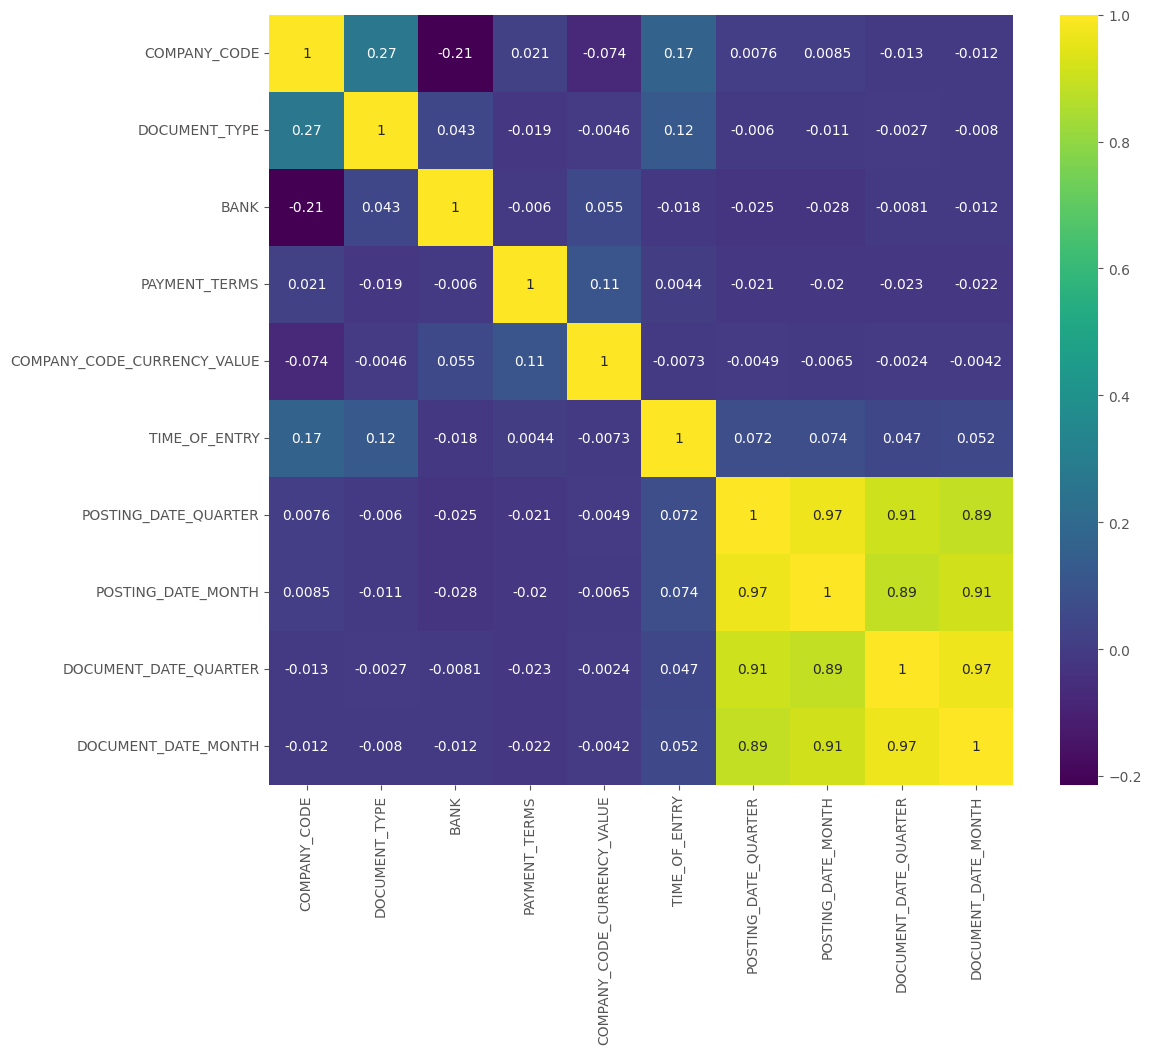

In [96]:
# find correlation
df_doc_time_corr = df_doc_time.corr()
df_doc_time_corr

#plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_doc_time_corr, annot=True, cmap='viridis')
plt.show()



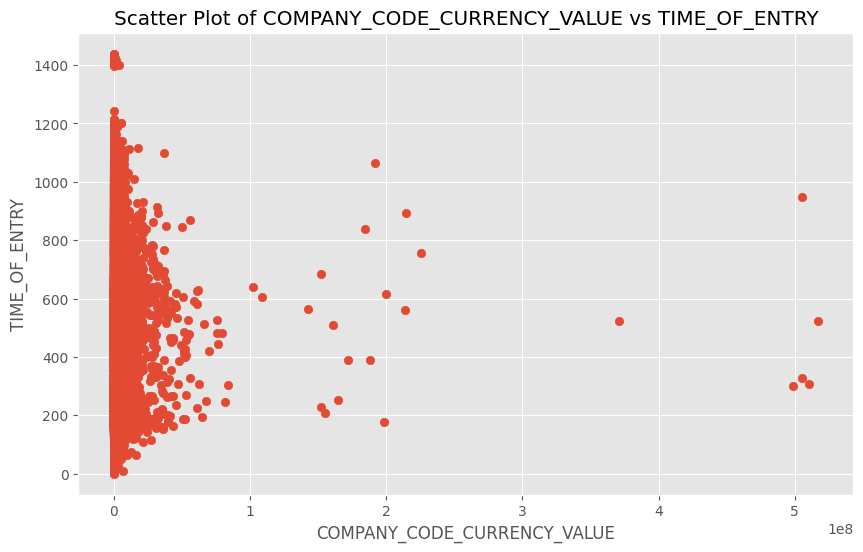

In [97]:
# Scatter plot and correlation line between TIME_OF_ENTRY and COMPANY_CODE_CURRENCY_VALUE
plt.figure(figsize=(10, 6))
plt.scatter(df_doc_time['COMPANY_CODE_CURRENCY_VALUE'], df_doc_time['TIME_OF_ENTRY'])
plt.xlabel('COMPANY_CODE_CURRENCY_VALUE')
plt.ylabel('TIME_OF_ENTRY')
plt.title('Scatter Plot of COMPANY_CODE_CURRENCY_VALUE vs TIME_OF_ENTRY')
plt.grid(True)
plt.show()

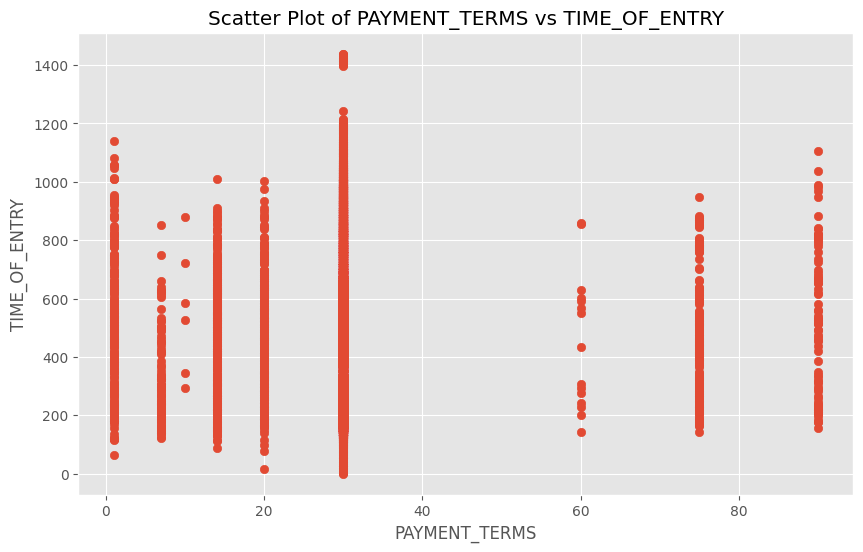

In [102]:
# Scatter plot and correlation line between TIME_OF_ENTRY and PAYMENT_TERM
plt.figure(figsize=(10, 6))
plt.scatter(df_doc_time['PAYMENT_TERMS'], df_doc_time['TIME_OF_ENTRY'])
plt.xlabel('PAYMENT_TERMS')
plt.ylabel('TIME_OF_ENTRY')
plt.title('Scatter Plot of PAYMENT_TERMS vs TIME_OF_ENTRY')
plt.grid(True)
plt.show()


 AR - Forecast amount

In [ ]:
df_ar = df.copy()

#Account Rev will be only  DOCUMENT_TYPE = "R2"

df_ar = df_ar[df_ar['DOCUMENT_TYPE'] == 'R2']
df_ar

,TRANSACTION_ID,CLEARED_ITEM,COMPANY_CODE,VENDOR_CODE,VENDOR_NAME,REFERENCE,DOCUMENT_NUMBER,DOCUMENT_TYPE,BANK,BANK_ACC,...,NET_DUE_DATE,COMPANY_CODE_CURRENCY_VALUE,COMPANY_CODE_CURRENCY_KEY,USER_ID,CLEARING_DATE,CLEARING_DOCUMENT,PAYMENT_TERMS,ENTRY_DATE,BASELINE_PAYMENT_DTE,TIME_OF_ENTRY
49314,49315,Selected,BB001,1008191,Pioneer Limited,A1152311200075,BB00140182941,R2,NaN,NaN,...,2023-11-09,57736.67,THB,DS0023,2023-11-24,BB0011400000885,1,2023-12-04,2023-11-09,07:43:52
49315,49316,Selected,AA001,1010739,Vision Consulting,A1122311200042,AA00140178330,R2,NaN,NaN,...,2024-02-18,2129911.49,THB,DS0018,2023-12-20,AA0011400000630,90,2023-11-26,2023-11-20,16:08:21
49316,49317,Selected,AA001,1011133,Fusion Limited,A1122311200055,AA00140181885,R2,NaN,NaN,...,2023-11-30,2942092.32,THB,DS0017,2024-04-01,AA001100019184,90,2023-12-01,2023-11-11,07:47:11
49317,49318,Selected,BB001,1011181,Innovative Partners,A1152311200070,BB00140181321,R2,NaN,NaN,...,2023-11-25,11307734.94,THB,DS0023,2023-12-01,BB0011400000902,14,2023-11-30,2023-11-01,15:01:35
49318,49319,Selected,BB001,1011181,Innovative Partners,A1152311200061,BB00140180989,R2,NaN,NaN,...,2023-12-14,820384.49,THB,DS0015,2023-12-13,BB0011400000953,14,2023-11-30,2023-11-01,06:25:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57985,57986,Selected,AA001,R000000104,Fusion Services,A1122407200043,AA00140340083,R2,NaN,NaN,...,2024-08-25,3598400.00,THB,DS0045,2024-08-15,AA0011400001071,1,2024-07-26,2024-07-26,04:32:40
57986,57987,Selected,AA001,R000000104,Fusion Services,A1122407200006,AA00140329538,R2,NaN,NaN,...,2024-08-08,3651008.64,THB,DS0045,2024-08-05,AA0011400001035,1,2024-07-10,2024-07-09,04:27:56
57987,57988,Selected,AA001,R000000104,Fusion Services,A1122408200035,AA00140356723,R2,NaN,NaN,...,2024-09-19,8000345.76,THB,DS0045,2024-09-12,AA0011400001218,1,2024-08-21,2024-08-20,04:34:00
57988,57989,Selected,AA001,R000000104,Fusion Services,A1122408200045,AA00140358319,R2,NaN,NaN,...,2024-11-20,6807060.00,THB,DS0045,2024-09-05,AA0011400001191,1,2024-08-23,2024-08-22,03:59:57


In [ ]:
df_ar.columns

Index(['TRANSACTION_ID', 'CLEARED_ITEM', 'COMPANY_CODE', 'VENDOR_CODE',
       'VENDOR_NAME', 'REFERENCE', 'DOCUMENT_NUMBER', 'DOCUMENT_TYPE', 'BANK',
       'BANK_ACC', 'BANK_INFO', 'DOCUMENT_DATE', 'POSTING_DATE',
       'NET_DUE_DATE', 'COMPANY_CODE_CURRENCY_VALUE',
       'COMPANY_CODE_CURRENCY_KEY', 'USER_ID', 'CLEARING_DATE',
       'CLEARING_DOCUMENT', 'PAYMENT_TERMS', 'ENTRY_DATE',
       'BASELINE_PAYMENT_DTE', 'TIME_OF_ENTRY'],
      dtype='object')

In [ ]:
df_ar = df_ar[['POSTING_DATE', 'COMPANY_CODE', 'VENDOR_NAME',
                        'DOCUMENT_DATE', 'NET_DUE_DATE', 'USER_ID', 'PAYMENT_TERMS', 'BASELINE_PAYMENT_DTE',
                        'COMPANY_CODE_CURRENCY_VALUE']]
df_ar

,POSTING_DATE,COMPANY_CODE,VENDOR_NAME,DOCUMENT_DATE,NET_DUE_DATE,USER_ID,PAYMENT_TERMS,BASELINE_PAYMENT_DTE,COMPANY_CODE_CURRENCY_VALUE
49314,2023-11-09,BB001,Pioneer Limited,2023-11-09,2023-11-09,DS0023,1,2023-11-09,57736.67
49315,2023-11-20,AA001,Vision Consulting,2023-11-20,2024-02-18,DS0018,90,2023-11-20,2129911.49
49316,2023-11-30,AA001,Fusion Limited,2023-11-30,2023-11-30,DS0017,90,2023-11-11,2942092.32
49317,2023-11-11,BB001,Innovative Partners,2023-11-11,2023-11-25,DS0023,14,2023-11-01,11307734.94
49318,2023-11-30,BB001,Innovative Partners,2023-11-30,2023-12-14,DS0015,14,2023-11-01,820384.49
...,...,...,...,...,...,...,...,...,...
57985,2024-07-26,AA001,Fusion Services,2024-07-26,2024-08-25,DS0045,1,2024-07-26,3598400.00
57986,2024-07-09,AA001,Fusion Services,2024-07-09,2024-08-08,DS0045,1,2024-07-09,3651008.64
57987,2024-08-20,AA001,Fusion Services,2024-08-20,2024-09-19,DS0045,1,2024-08-20,8000345.76
57988,2024-08-22,AA001,Fusion Services,2024-08-22,2024-11-20,DS0045,1,2024-08-22,6807060.00


In [ ]:
# transform DOCUMENT_DATE to DOCUMENT_YEAR, DOCUMENT_MONTH, DOCUMENT_MONTH
df_ar['DOCUMENT_YEAR'] = df_ar['DOCUMENT_DATE'].dt.year
df_ar['DOCUMENT_MONTH'] = df_ar['DOCUMENT_DATE'].dt.month
df_ar['DOCUMENT_DAY'] = df_ar['DOCUMENT_DATE'].dt.day

# transform NET_DUE_DATE to NET_DUE_YEAR, NET_DUE_MONTH, NET_DUE_DAY
df_ar['NET_DUE_YEAR'] = df_ar['NET_DUE_DATE'].dt.year
df_ar['NET_DUE_MONTH'] = df_ar['NET_DUE_DATE'].dt.month
df_ar['NET_DUE_DAY'] = df_ar['NET_DUE_DATE'].dt.day

#BASELINE_PAYMENT_DTE - POSTING_DATE to calculate ACTUAL_PAYMENT
#If value is positive = good, becuase we "receive" money before duedate
df_ar['ACTUAL_PAYMENT'] = (df_ar['POSTING_DATE'] - df_ar['BASELINE_PAYMENT_DTE']).dt.days
df_ar

<ipython-input-148-3e4e38add953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar['DOCUMENT_YEAR'] = df_ar['DOCUMENT_DATE'].dt.year
<ipython-input-148-3e4e38add953>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar['DOCUMENT_MONTH'] = df_ar['DOCUMENT_DATE'].dt.month
<ipython-input-148-3e4e38add953>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,POSTING_DATE,COMPANY_CODE,VENDOR_NAME,DOCUMENT_DATE,NET_DUE_DATE,USER_ID,PAYMENT_TERMS,BASELINE_PAYMENT_DTE,COMPANY_CODE_CURRENCY_VALUE,DOCUMENT_YEAR,DOCUMENT_MONTH,DOCUMENT_DAY,NET_DUE_YEAR,NET_DUE_MONTH,NET_DUE_DAY,ACTUAL_PAYMENT
49314,2023-11-09,BB001,Pioneer Limited,2023-11-09,2023-11-09,DS0023,1,2023-11-09,57736.67,2023,11,9,2023,11,9,0
49315,2023-11-20,AA001,Vision Consulting,2023-11-20,2024-02-18,DS0018,90,2023-11-20,2129911.49,2023,11,20,2024,2,18,0
49316,2023-11-30,AA001,Fusion Limited,2023-11-30,2023-11-30,DS0017,90,2023-11-11,2942092.32,2023,11,30,2023,11,30,19
49317,2023-11-11,BB001,Innovative Partners,2023-11-11,2023-11-25,DS0023,14,2023-11-01,11307734.94,2023,11,11,2023,11,25,10
49318,2023-11-30,BB001,Innovative Partners,2023-11-30,2023-12-14,DS0015,14,2023-11-01,820384.49,2023,11,30,2023,12,14,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57985,2024-07-26,AA001,Fusion Services,2024-07-26,2024-08-25,DS0045,1,2024-07-26,3598400.00,2024,7,26,2024,8,25,0
57986,2024-07-09,AA001,Fusion Services,2024-07-09,2024-08-08,DS0045,1,2024-07-09,3651008.64,2024,7,9,2024,8,8,0
57987,2024-08-20,AA001,Fusion Services,2024-08-20,2024-09-19,DS0045,1,2024-08-20,8000345.76,2024,8,20,2024,9,19,0
57988,2024-08-22,AA001,Fusion Services,2024-08-22,2024-11-20,DS0045,1,2024-08-22,6807060.00,2024,8,22,2024,11,20,0


In [ ]:
# Drop DOCUMENT_DATE, NET_DUE_DATE, BASELINE_PAYMENT_DTE
df_ar = df_ar.drop(['DOCUMENT_DATE', 'NET_DUE_DATE', 'BASELINE_PAYMENT_DTE'], axis=1)
df_ar

,POSTING_DATE,COMPANY_CODE,VENDOR_NAME,USER_ID,PAYMENT_TERMS,COMPANY_CODE_CURRENCY_VALUE,DOCUMENT_YEAR,DOCUMENT_MONTH,DOCUMENT_DAY,NET_DUE_YEAR,NET_DUE_MONTH,NET_DUE_DAY,ACTUAL_PAYMENT
49314,2023-11-09,BB001,Pioneer Limited,DS0023,1,57736.67,2023,11,9,2023,11,9,0
49315,2023-11-20,AA001,Vision Consulting,DS0018,90,2129911.49,2023,11,20,2024,2,18,0
49316,2023-11-30,AA001,Fusion Limited,DS0017,90,2942092.32,2023,11,30,2023,11,30,19
49317,2023-11-11,BB001,Innovative Partners,DS0023,14,11307734.94,2023,11,11,2023,11,25,10
49318,2023-11-30,BB001,Innovative Partners,DS0015,14,820384.49,2023,11,30,2023,12,14,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57985,2024-07-26,AA001,Fusion Services,DS0045,1,3598400.00,2024,7,26,2024,8,25,0
57986,2024-07-09,AA001,Fusion Services,DS0045,1,3651008.64,2024,7,9,2024,8,8,0
57987,2024-08-20,AA001,Fusion Services,DS0045,1,8000345.76,2024,8,20,2024,9,19,0
57988,2024-08-22,AA001,Fusion Services,DS0045,1,6807060.00,2024,8,22,2024,11,20,0


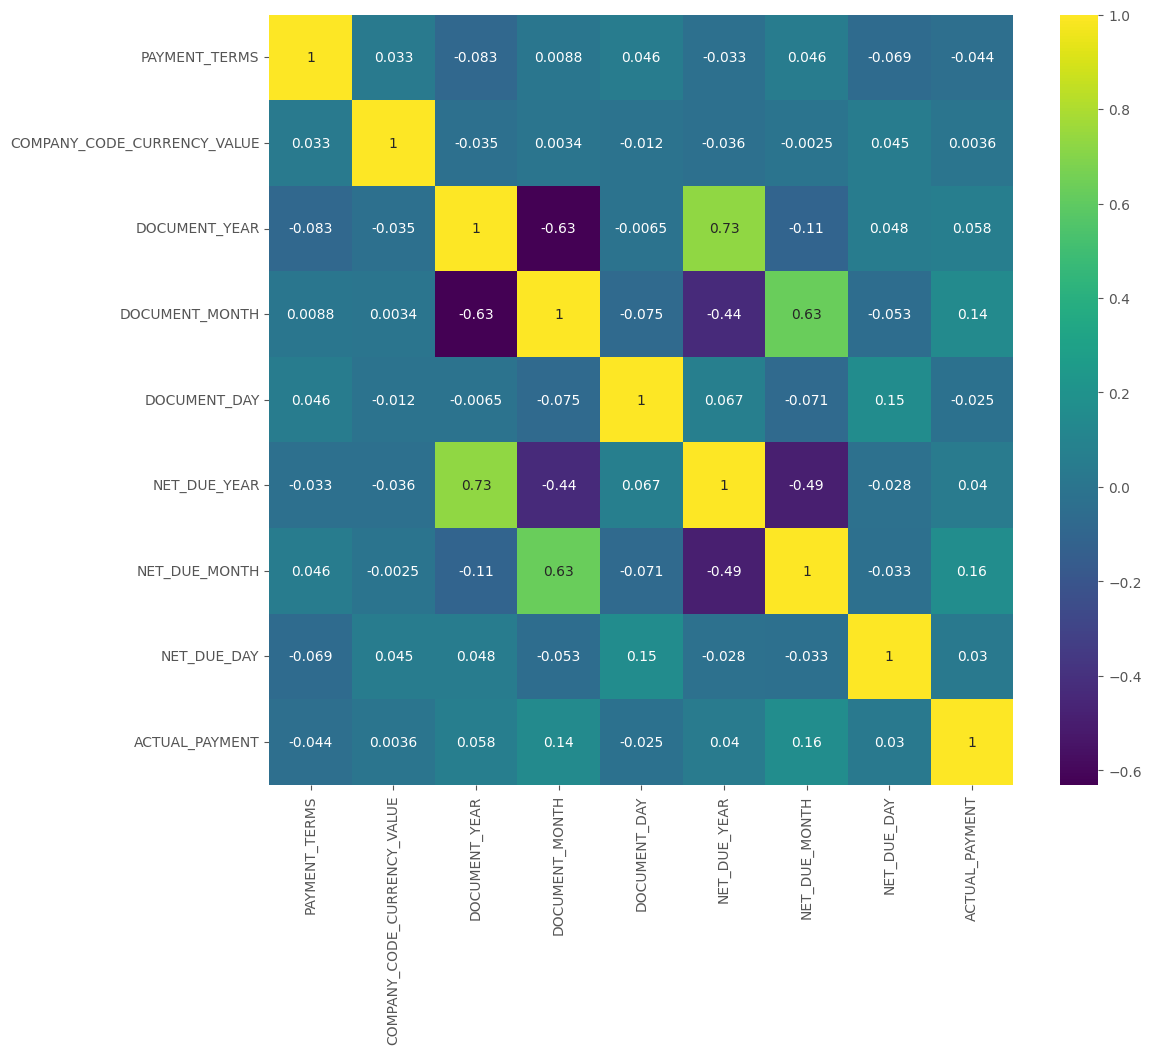

In [ ]:
# Calculate the correlation matrix
df_ar_corr = df_ar[[
                          'PAYMENT_TERMS', 'COMPANY_CODE_CURRENCY_VALUE', 'DOCUMENT_YEAR',
                          'DOCUMENT_MONTH', 'DOCUMENT_DAY', 'NET_DUE_YEAR', 'NET_DUE_MONTH',
                          'NET_DUE_DAY', 'ACTUAL_PAYMENT']]
df_ar_corr.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_ar_corr.corr(), annot=True, cmap='viridis')
plt.show()

 AP - Forecast amount

In [ ]:
df_ap = df.copy()

#Account Payable will be only  DOCUMENT_TYPE = "RE", "KR"

df_ap = df_ap[(df_ap['DOCUMENT_TYPE'] == 'RE') | (df_ap['DOCUMENT_TYPE'] == 'KR')]
df_ap.head(5)

,TRANSACTION_ID,CLEARED_ITEM,COMPANY_CODE,VENDOR_CODE,VENDOR_NAME,REFERENCE,DOCUMENT_NUMBER,DOCUMENT_TYPE,BANK,BANK_ACC,...,NET_DUE_DATE,COMPANY_CODE_CURRENCY_VALUE,COMPANY_CODE_CURRENCY_KEY,USER_ID,CLEARING_DATE,CLEARING_DOCUMENT,PAYMENT_TERMS,ENTRY_DATE,BASELINE_PAYMENT_DTE,TIME_OF_ENTRY
0,1,Selected,BB001,15137258,Global Systems,INV022411-025,BB0015100000822,RE,NaN,NaN,...,2023-03-15,53500.0,THB,DS0063,2023-03-15,BB0011500000673,30,2023-02-23,2023-02-14,07:21:57
1,2,Selected,AA001,61136291,Vision Group,1/2024,AA0015100013474,RE,NaN,NaN,...,2023-09-30,173586.0,THB,DS0077,2023-09-25,AA0011500004378,30,2023-09-10,2023-08-31,04:13:54
2,3,Selected,AA001,61136291,Vision Group,2/2024,AA0015100015157,RE,NaN,NaN,...,2023-10-19,260577.0,THB,DS0069,2023-10-22,AA0011500004854,30,2023-10-08,2023-09-19,07:10:19
5,6,Selected,AA001,61136307,Solutions Limited,6612008,AA0015100005702,RE,NaN,NaN,...,2023-01-08,24610.0,THB,DS0079,2023-01-10,AA0011500000102,30,2023-12-19,2023-12-08,09:42:27
6,7,Selected,AA001,61136307,Solutions Limited,6704020,AA0015100005942,RE,NaN,NaN,...,2023-05-19,3370.5,THB,DS0079,2023-05-21,AA0011500002347,30,2023-04-25,2023-04-19,10:33:06


In [ ]:
## SAME process with AR
## However, CLEARING_DATE is needed for calculate ACTUAL_PAYMENT

df_ap = df_ap[['POSTING_DATE', 'COMPANY_CODE', 'VENDOR_NAME',
                        'DOCUMENT_DATE', 'NET_DUE_DATE', 'USER_ID', 'PAYMENT_TERMS', 'BASELINE_PAYMENT_DTE', 'CLEARING_DATE',
                        'COMPANY_CODE_CURRENCY_VALUE']]
# transform DOCUMENT_DATE to DOCUMENT_YEAR, DOCUMENT_MONTH, DOCUMENT_MONTH
df_ap['DOCUMENT_YEAR'] = df_ap['DOCUMENT_DATE'].dt.year
df_ap['DOCUMENT_MONTH'] = df_ap['DOCUMENT_DATE'].dt.month
df_ap['DOCUMENT_DAY'] = df_ap['DOCUMENT_DATE'].dt.day

# transform NET_DUE_DATE to NET_DUE_YEAR, NET_DUE_MONTH, NET_DUE_DAY
df_ap['NET_DUE_YEAR'] = df_ap['NET_DUE_DATE'].dt.year
df_ap['NET_DUE_MONTH'] = df_ap['NET_DUE_DATE'].dt.month
df_ap['NET_DUE_DAY'] = df_ap['NET_DUE_DATE'].dt.day

#BASELINE_PAYMENT_DTE - POSTING_DATE to calculate ACTUAL_DUE_DATE
#If value is positive = good, becuase we "receive" money before duedate
df_ap['ACTUAL_PAYMENT'] = (df_ap['CLEARING_DATE'] - df_ap['BASELINE_PAYMENT_DTE']).dt.days

# Then ACTUAL_DUE_DATE - Payment_term to calculate whether overdue and how many it is
# Negative number = overdue
df_ap['ACTUAL_PAYMENT'] = (df_ap['ACTUAL_PAYMENT'] - df_ap['PAYMENT_TERMS'])

# Drop DOCUMENT_DATE, NET_DUE_DATE, BASELINE_PAYMENT_DTE
df_ap = df_ap.drop(['DOCUMENT_DATE', 'NET_DUE_DATE', 'BASELINE_PAYMENT_DTE', 'CLEARING_DATE'], axis=1)
df_ap

<ipython-input-158-2638defcbc02>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap['DOCUMENT_YEAR'] = df_ap['DOCUMENT_DATE'].dt.year
<ipython-input-158-2638defcbc02>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap['DOCUMENT_MONTH'] = df_ap['DOCUMENT_DATE'].dt.month
<ipython-input-158-2638defcbc02>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,POSTING_DATE,COMPANY_CODE,VENDOR_NAME,USER_ID,PAYMENT_TERMS,COMPANY_CODE_CURRENCY_VALUE,DOCUMENT_YEAR,DOCUMENT_MONTH,DOCUMENT_DAY,NET_DUE_YEAR,NET_DUE_MONTH,NET_DUE_DAY,ACTUAL_PAYMENT
0,2023-02-21,BB001,Global Systems,DS0063,30,53500.00,2023.0,2.0,14.0,2023.0,3.0,15.0,-1.0
1,2023-09-01,AA001,Vision Group,DS0077,30,173586.00,2023.0,8.0,31.0,2023.0,9.0,30.0,-5.0
2,2023-10-01,AA001,Vision Group,DS0069,30,260577.00,2023.0,9.0,19.0,2023.0,10.0,19.0,3.0
5,2023-12-08,AA001,Solutions Limited,DS0079,30,24610.00,2023.0,12.0,8.0,2023.0,1.0,8.0,-362.0
6,2023-04-19,AA001,Solutions Limited,DS0079,30,3370.50,2023.0,4.0,19.0,2023.0,5.0,19.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57787,2023-04-24,CC001,Prime Group,DS0059,30,23540.00,NaN,NaN,NaN,2023.0,3.0,30.0,NaN
57788,2023-04-30,CC001,Pioneer Corporation,DS0092,30,420.00,NaN,NaN,NaN,2023.0,3.0,30.0,NaN
57789,2023-05-31,CC001,Elite Limited,DS0056,30,40613.56,NaN,NaN,NaN,2023.0,3.0,8.0,NaN
57790,2023-05-31,CC001,Elite Limited,DS0056,30,6768927.00,NaN,NaN,NaN,2023.0,3.0,8.0,NaN


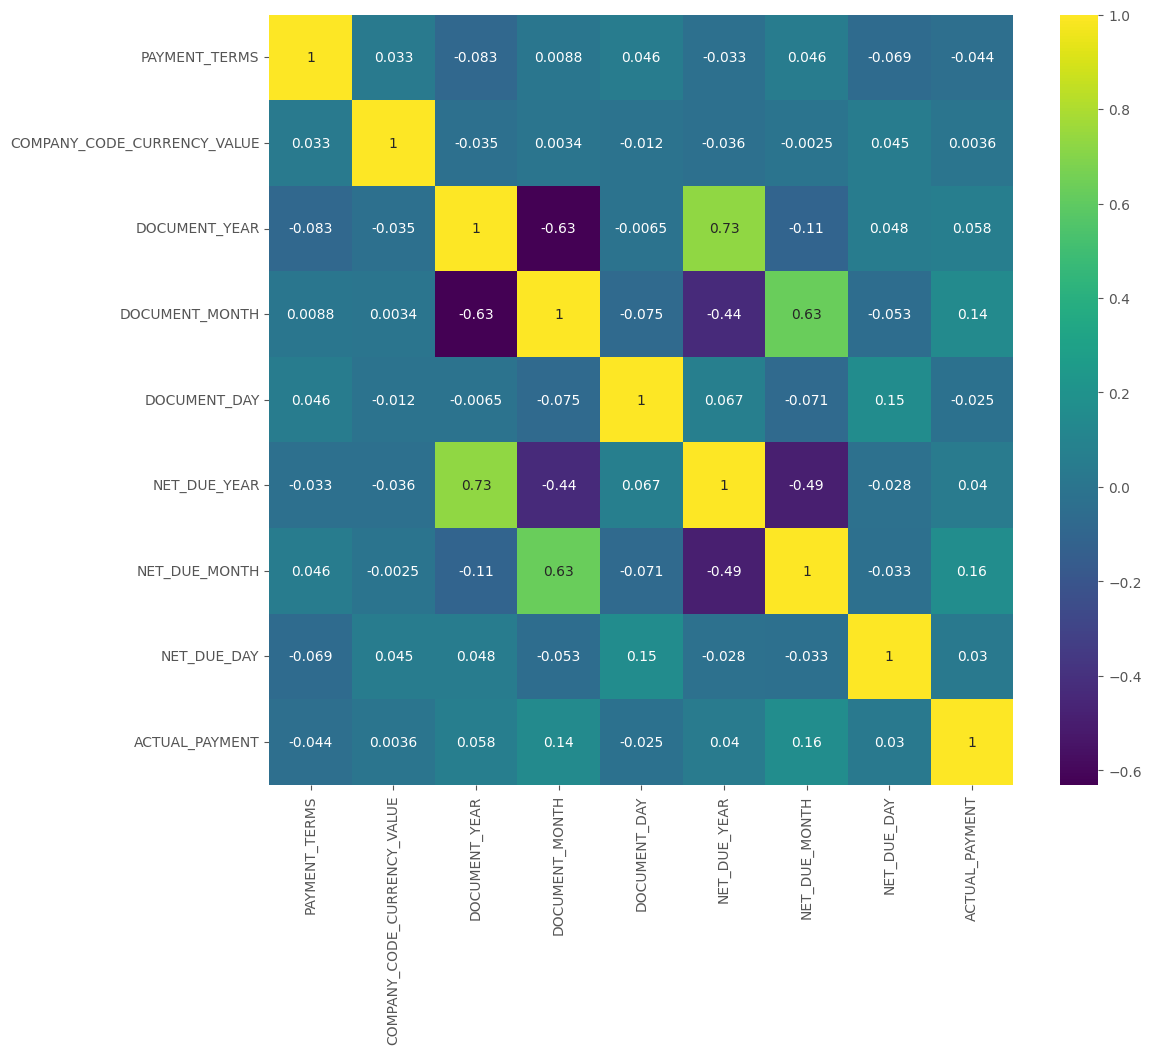

In [ ]:
# Calculate the correlation matrix
df_ap_corr = df_ap[[
                          'PAYMENT_TERMS', 'COMPANY_CODE_CURRENCY_VALUE', 'DOCUMENT_YEAR',
                          'DOCUMENT_MONTH', 'DOCUMENT_DAY', 'NET_DUE_YEAR', 'NET_DUE_MONTH',
                          'NET_DUE_DAY', 'ACTUAL_PAYMENT']]
df_ap_corr.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_ar_corr.corr(), annot=True, cmap='viridis')
plt.show()

## Preprocessing

In [ ]:
df_ar.columns

Index(['POSTING_DATE', 'COMPANY_CODE', 'VENDOR_NAME', 'USER_ID',
       'PAYMENT_TERMS', 'COMPANY_CODE_CURRENCY_VALUE', 'DOCUMENT_YEAR',
       'DOCUMENT_MONTH', 'DOCUMENT_DAY', 'NET_DUE_YEAR', 'NET_DUE_MONTH',
       'NET_DUE_DAY', 'ACTUAL_PAYMENT'],
      dtype='object')

In [57]:
# Import libs for sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

In [ ]:
# Define the target and features
X_ar = df_ar[['COMPANY_CODE', 'VENDOR_NAME', 'USER_ID',
                'PAYMENT_TERMS', 'DOCUMENT_YEAR',
                'DOCUMENT_MONTH', 'DOCUMENT_DAY', 'NET_DUE_YEAR', 'NET_DUE_MONTH',
                'NET_DUE_DAY', 'ACTUAL_PAYMENT']]
y_ar = df_ar['COMPANY_CODE_CURRENCY_VALUE']

In [ ]:
X_ar.head(5)

,COMPANY_CODE,VENDOR_NAME,USER_ID,PAYMENT_TERMS,DOCUMENT_YEAR,DOCUMENT_MONTH,DOCUMENT_DAY,NET_DUE_YEAR,NET_DUE_MONTH,NET_DUE_DAY,ACTUAL_PAYMENT
49314,BB001,Pioneer Limited,DS0023,1,2023,11,9,2023,11,9,0
49315,AA001,Vision Consulting,DS0018,90,2023,11,20,2024,2,18,0
49316,AA001,Fusion Limited,DS0017,90,2023,11,30,2023,11,30,19
49317,BB001,Innovative Partners,DS0023,14,2023,11,11,2023,11,25,10
49318,BB001,Innovative Partners,DS0015,14,2023,11,30,2023,12,14,29


In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ar, y_ar, test_size=0.2, random_state=42)




In [ ]:
# Define categorical and numeric columns
categorical_columns = ['COMPANY_CODE', 'VENDOR_NAME', 'USER_ID']
numeric_columns = [#'POSTING_DATE',
                  'PAYMENT_TERMS', 'DOCUMENT_YEAR', 'DOCUMENT_MONTH',
                   'DOCUMENT_DAY', 'NET_DUE_YEAR', 'NET_DUE_MONTH',
                  'NET_DUE_DAY', 'ACTUAL_PAYMENT']


In [ ]:
# Define preprocessing for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        #('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

In [ ]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [ ]:
# Train the pipeline
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['COMPANY_CODE',
                                                   'VENDOR_NAME',
                                                   'USER_ID'])])),
                ('model', LinearRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred

array([ 4.08746224e+06,  5.20761410e+06,  6.28557654e+06,  1.54284559e+06,
        5.51672868e+06,  1.66527335e+06,  4.74110443e+06,  1.32516789e+05,
        1.99798006e+06,  5.19653380e+06,  3.39666370e+06,  2.52644691e+05,
        7.77885270e+06,  3.63464378e+06,  6.60436454e+06,  8.68530582e+06,
        1.32516789e+05,  6.28557654e+06,  4.08746224e+06,  2.50707242e+06,
        5.69419354e+06,  5.69419354e+06,  8.36625739e+06,  7.16981926e+06,
        4.08746224e+06,  5.20761410e+06,  1.32516789e+05,  4.74110443e+06,
        4.86285267e+06,  6.24101514e+06,  6.54962451e+06,  6.19492986e+06,
        1.43847432e+06,  5.51672868e+06,  3.35183262e+06,  6.24101514e+06,
        5.69419354e+06,  5.93217361e+06,  5.19653380e+06,  5.51672868e+06,
        1.05423206e+07,  4.70444447e+06,  1.55569813e+07,  6.75208620e+06,
        5.69419354e+06,  6.18138396e+06,  4.74110443e+06,  5.23474083e+06,
        5.51672868e+06,  7.52240569e+06,  6.81026314e+06,  4.74110443e+06,
        1.42121386e+06,  

Evaluation Score of the trained and test

In [ ]:
# Evaluate the model
print("Training score:", pipeline.score(X_train, y_train))
print("Test score:", pipeline.score(X_test, y_test))

#R2 score (coefficient of determination)
print("Training set score: {:.2f}".format(pipeline.score(X_train, y_train)))
print("Test set score: {:.2f}".format(pipeline.score(X_test, y_test)))

Training score: 0.2772144985022177
Test score: 0.1474074871290023
Training set score: 0.28
Test set score: 0.15


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
mse_test=mean_squared_error(y_test, y_pred)
print("Mean squared error: %.2f" % mse_test)

# R2-score: Explained variance score: 1 is perfect prediction
r2_test= r2_score(y_test, y_pred)
print('R2: %.2f' % r2_test)

Mean squared error: 11998018691866.02
Variance score: 0.15


In [ ]:
# Replace LinearRegression with Ridge (example with tunable parameters)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

# Define the parameter grid
param_grid = {
    'model__alpha': [0.1, 1.0, 10.0, 100.0],  # Hyperparameters for Ridge regression
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Metric to optimize
    n_jobs=-1  # Use all available CPU cores
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (negative MSE):", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test Set Score (negative MSE):", test_score)

Best Parameters: {'model__alpha': 1.0}
Best Score (negative MSE): -18503835879635.33
Test Set Score (negative MSE): -11973942263891.97


# Model Assessment

In [106]:
# Import libs for sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor, plot_importance

    functions for Model Assessment

In [121]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination)

def machine_learning_regression(X, y, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

    model = algorithm().fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}

    return accuracy_metrics

In [125]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price with numeric StandardScaler
def machine_learning_regression_with_scaler(X, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

    numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = X.select_dtypes(include=['object']).columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ]
    )
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', algorithm())
    ])
    pipeline.fit(x_train, y_train)
    y_pred_train = pipeline.predict(x_train)
    y_pred_test = pipeline.predict(x_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_train' : r2_train,
                        'R2_test'  : r2_test}
    return accuracy_metrics


      DOC TIME Forecasting

In [104]:
df_doc_time.columns

Index(['COMPANY_CODE', 'DOCUMENT_TYPE', 'BANK', 'PAYMENT_TERMS',
       'COMPANY_CODE_CURRENCY_VALUE', 'TIME_OF_ENTRY', 'POSTING_DATE_QUARTER',
       'POSTING_DATE_MONTH', 'DOCUMENT_DATE_QUARTER', 'DOCUMENT_DATE_MONTH'],
      dtype='object')

In [112]:
# Calculate the percentage of null values in each column
null_percentage = df_doc_time.isnull().sum() * 100 / len(df)

# Print the results
null_percentage

,0
COMPANY_CODE,0.000000
DOCUMENT_TYPE,0.000000
BANK,0.000000
PAYMENT_TERMS,0.000000
COMPANY_CODE_CURRENCY_VALUE,0.000000
TIME_OF_ENTRY,0.000000
POSTING_DATE_QUARTER,0.670805
POSTING_DATE_MONTH,0.670805
DOCUMENT_DATE_QUARTER,0.341438
DOCUMENT_DATE_MONTH,0.341438


In [113]:
# replace null with 0
df_doc_time = df_doc_time.fillna(0)

In [114]:


# Define the target and features
X_doc = df_doc_time[['COMPANY_CODE', 'DOCUMENT_TYPE', 'BANK', 'PAYMENT_TERMS',
                  'COMPANY_CODE_CURRENCY_VALUE', 'POSTING_DATE_QUARTER',
                  'POSTING_DATE_MONTH', 'DOCUMENT_DATE_QUARTER', 'DOCUMENT_DATE_MONTH']]
y_doc = df_doc_time['TIME_OF_ENTRY']

In [123]:
print(machine_learning_regression(X_doc,y_doc, DecisionTreeRegressor))
print(machine_learning_regression(X_doc,y_doc, ExtraTreesRegressor))
print(machine_learning_regression(X_doc,y_doc, RandomForestRegressor))
print(machine_learning_regression(X_doc,y_doc, AdaBoostRegressor))
print(machine_learning_regression(X_doc,y_doc, GradientBoostingRegressor))
print(machine_learning_regression(X_doc,y_doc, XGBRegressor))
print(machine_learning_regression(X_doc,y_doc, LinearRegression))
print(machine_learning_regression(X_doc,y_doc, Ridge))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.8752148483889227, 'R2_test': -0.4105829747367864}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.8751966059482355, 'R2_test': -0.20031947739495237}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.766738310193425, 'R2_test': -0.00040009158580867066}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.02520912734180536, 'R2_test': 0.02402548838010743}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.08926682477640613, 'R2_test': 0.0795379016413299}
{'algorithm': 'XGBRegressor', 'R2_train': 0.24169939756393433, 'R2_test': 0.12765628099441528}
{'algorithm': 'LinearRegression', 'R2_train': 0.03978472508099018, 'R2_test': 0.039172306651549915}
{'algorithm': 'Ridge', 'R2_train': 0.03978472476680095, 'R2_test': 0.039172147232970245}


In [126]:
print(machine_learning_regression_with_scaler(X_doc,y_doc, DecisionTreeRegressor))
print(machine_learning_regression_with_scaler(X_doc,y_doc, ExtraTreesRegressor))
print(machine_learning_regression_with_scaler(X_doc,y_doc, RandomForestRegressor))
print(machine_learning_regression_with_scaler(X_doc,y_doc, AdaBoostRegressor))
print(machine_learning_regression_with_scaler(X_doc,y_doc, GradientBoostingRegressor))
print(machine_learning_regression_with_scaler(X_doc,y_doc, XGBRegressor))
print(machine_learning_regression_with_scaler(X_doc,y_doc, LinearRegression))
print(machine_learning_regression_with_scaler(X_doc,y_doc, Ridge))

{'algorithm': 'DecisionTreeRegressor', 'R2_train': 0.8736191509668544, 'R2_test': -0.4126495794402272}
{'algorithm': 'ExtraTreesRegressor', 'R2_train': 0.873633686652512, 'R2_test': -0.19948480294651594}
{'algorithm': 'RandomForestRegressor', 'R2_train': 0.7657184523471667, 'R2_test': 0.0046734920992177464}
{'algorithm': 'AdaBoostRegressor', 'R2_train': 0.02812989351741002, 'R2_test': 0.02711301749027939}
{'algorithm': 'GradientBoostingRegressor', 'R2_train': 0.09039910744858581, 'R2_test': 0.0803812696280034}
{'algorithm': 'XGBRegressor', 'R2_train': 0.2436288595199585, 'R2_test': 0.12775176763534546}
{'algorithm': 'LinearRegression', 'R2_train': 0.03978472508099007, 'R2_test': 0.03917230665450333}
{'algorithm': 'Ridge', 'R2_train': 0.03978472467031213, 'R2_test': 0.03917216604776819}


In [127]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_doc, y_doc, test_size=0.3, random_state=42)

# Define the XGBRegressor and parameter grid
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the XGBRegressor and parameter grid
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error',
                           cv=5, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Mean Absolute Error:", mae)
print("Test Mean Squared Error:", mse)
print("Test R² Score:", r2)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best Score (MSE): 41579.44629928228
Test Mean Absolute Error: 166.53880440570052
Test Mean Squared Error: 42264.87014596247
Test R² Score: 0.13615834712982178


Feature Importance Plot

<Figure size 1000x800 with 0 Axes>

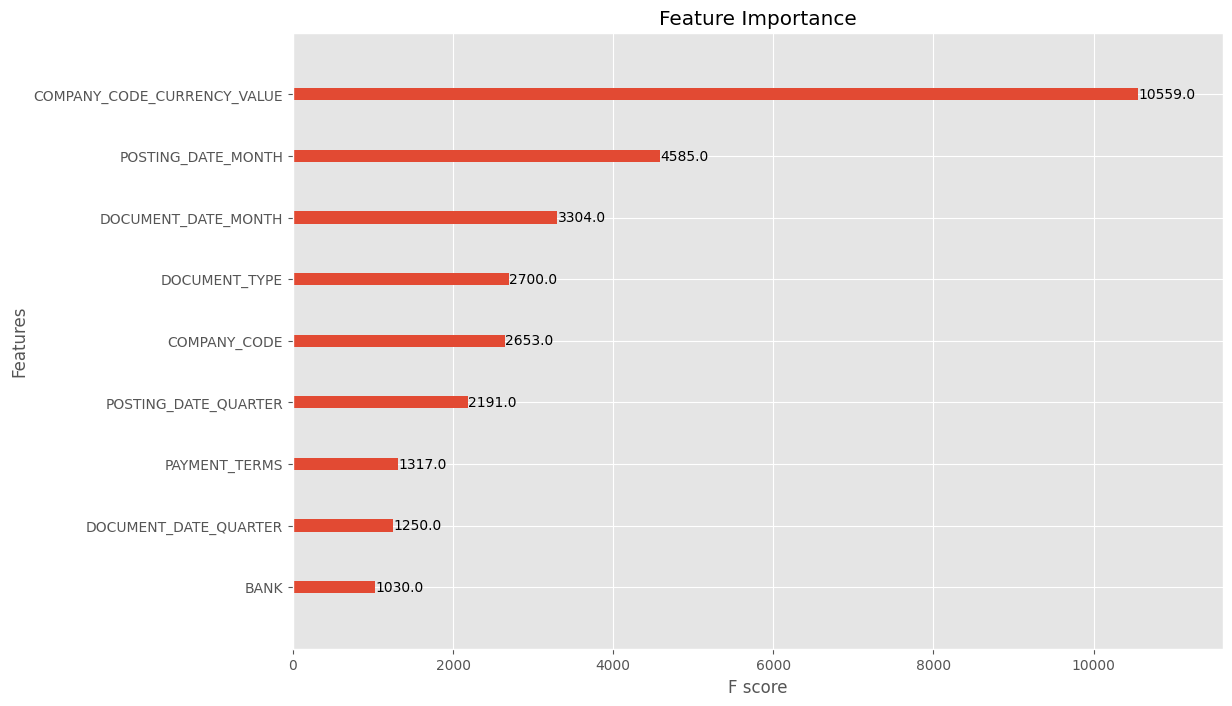

In [128]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_model, importance_type='weight', title="Feature Importance")
plt.show()


Residual Plot

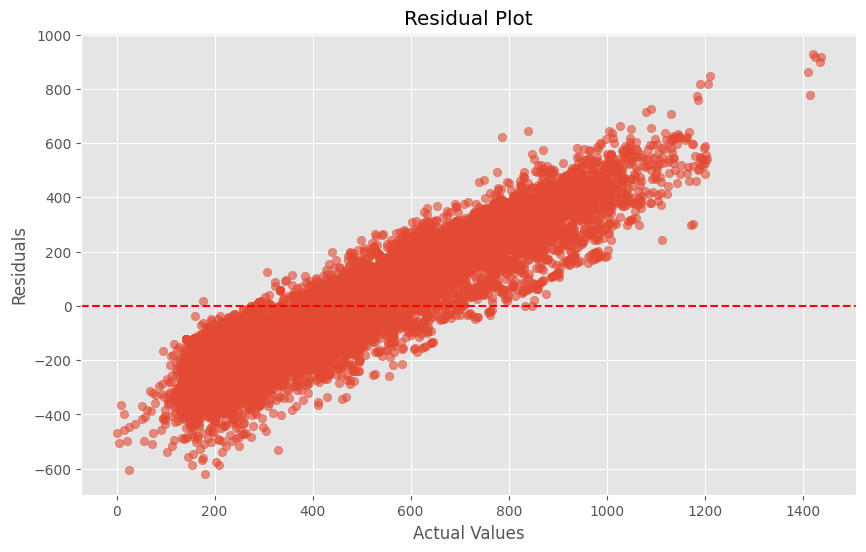

In [129]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()


Actual vs. Predicted Values

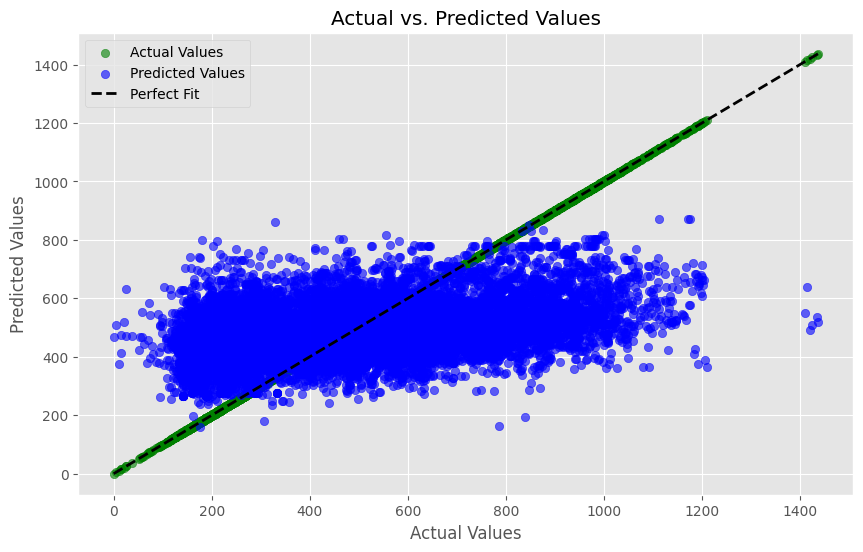

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, alpha=0.6, color='green', label='Actual Values')  # Actual values
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted Values')  # Predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Learning Curve

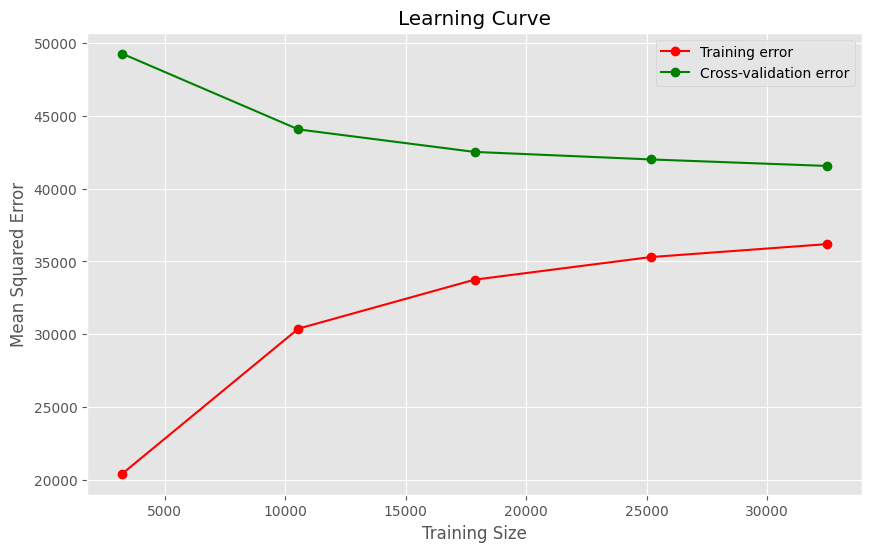

In [131]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate mean and std of scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation error')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()


Predictions Distribution

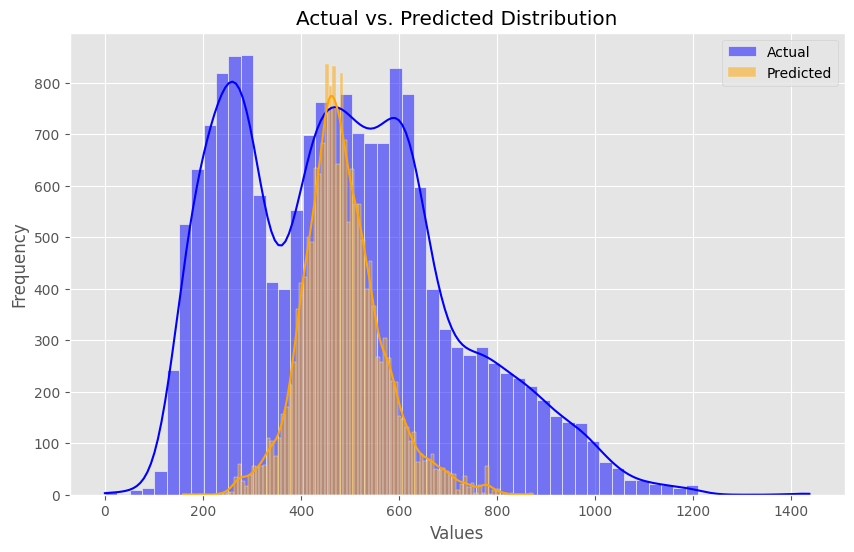

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', kde=True, label='Actual', alpha=0.5)
sns.histplot(y_pred, color='orange', kde=True, label='Predicted', alpha=0.5)
plt.title('Actual vs. Predicted Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()